In [ ]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 로드

In [ ]:
df_2024 = pd.read_csv("/content/drive/MyDrive/tour/cluster1.csv", index_col=0)

/tmp/ipython-input-4-3314172470.py:1: DtypeWarning: Columns (24,25,27,28,29,30,50,60,61,65,66,68,76,81,117,118,119,125,126,127,134,227,228,229,233,236,240,241,247,277,283) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv("/content/drive/MyDrive/tour/cluster1.csv", index_col=0)


In [ ]:
df_cluster1_2024 = df_2024.copy()
df_cluster1_2024.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight,cluster,재방문자,재방문의향긍정
9,69,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,NaN,NaN,...,1 회,개 별 여 행,1005.032741,NaN,NaN,NaN,1005.032741,1,False,False
19,85,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행",사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,1 회,개 별 여 행,1210.286770,NaN,NaN,NaN,1210.286770,1,False,False
28,101,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",과거 방문 경험이 좋아서,"한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",계획한 여행 경비에 적합한 여행지여서,태국,...,3 회,개 별 여 행,554.457606,NaN,NaN,NaN,554.457606,1,True,False
31,104,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","교육(어학 프로그램, 연수 등)",NaN,NaN,NaN,NaN,...,1 회,개 별 여 행,99.583958,NaN,NaN,NaN,99.583958,1,False,False
33,107,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",새로운 국가에 가고 싶어서,계획한 여행 경비에 적합한 여행지여서,NaN,일본,...,1 회,개 별 여 행,550.525754,NaN,NaN,NaN,550.525754,1,False,False


In [ ]:
df_cluster1_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 9 to 16215
Columns: 405 entries, pnid to 재방문의향긍정
dtypes: bool(2), float64(138), int64(20), object(245)
memory usage: 12.8+ MB


# **총 지출별 재방문 의사 분포**

## **가설**
- 고지출 방문객일수록 (만족도가 높을 것이고) 재방문 의향이 높을 것이다.

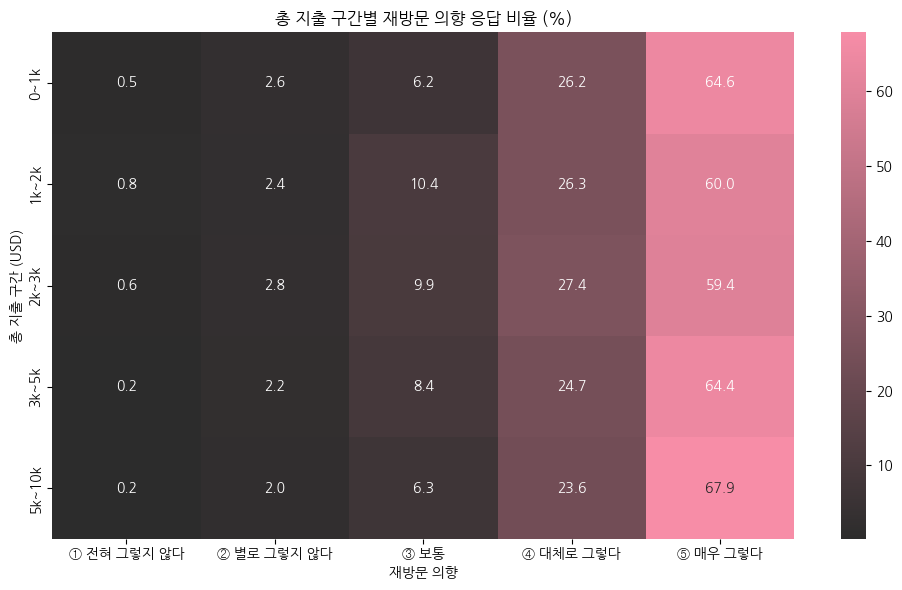

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib.colors import LinearSegmentedColormap

# 1. 순서 및 매핑 정의
order = [
    '1000$ 이하',
    '1000$ 초과 - 2000$ 이하',
    '2000$ 초과 - 3000$ 이하',
    '3000$ 초과 - 5000$ 이하',
    '5000$ 초과 - 10000$ 이하'
]

label_map = {
    '1000$ 이하': '0~1k',
    '1000$ 초과 - 2000$ 이하': '1k~2k',
    '2000$ 초과 - 3000$ 이하': '2k~3k',
    '3000$ 초과 - 5000$ 이하': '3k~5k',
    '5000$ 초과 - 10000$ 이하': '5k~10k'
}

q13_order = [
    '① 전혀 그렇지 않다',
    '② 별로 그렇지 않다',
    '③ 보통',
    '④ 대체로 그렇다',
    '⑤ 매우 그렇다'
]

# 2. 유효한 값만 필터링
df_valid = df_cluster1_2024[
    df_cluster1_2024["C총액1인TOT2"].isin(order) &
    df_cluster1_2024["Q13"].isin(q13_order)
].copy()

# 3. 간단한 레이블로 변경
df_valid["총지출_간단"] = df_valid["C총액1인TOT2"].map(label_map)

# 4. 교차표 (행: 총지출, 열: 재방문의향)
cross = pd.crosstab(df_valid["총지출_간단"], df_valid["Q13"], normalize='index') * 100
cross = cross[q13_order]  # 열 순서 고정

# 5. 히트맵 시각화
plt.figure(figsize=(10, 6))
cmap = LinearSegmentedColormap.from_list("pinkgray", ["#2c2c2c", "#f78da7"], N=256)
sns.heatmap(cross, annot=True, fmt=".1f", cmap=cmap, cbar=True)

plt.xlabel("재방문 의향")
plt.ylabel("총 지출 구간 (USD)")
plt.title("총 지출 구간별 재방문 의향 응답 비율 (%)")
plt.tight_layout()
plt.show()


#### 도출!

➤ 강력한 재방문 의사 <br>
- 모든 지출 구간에서 ④+⑤(“대체로” + “매우” 그렇다) 응답 합이 ≈90% 이상으로, 전반적으로 재방문 의사가 매우 높음.

➤ 지출 증가에 따른 ‘매우 그렇다’ 비율 상승 <br>
- 고지출 집단일수록 ‘매우 그렇다’ 응답 비율이 가장 높아, 지출 수준이 높으면 높을수록 재방문 충성도가 더 강함.

➤ 중간 지출(1–3k)에서 약간의 이탈 가능성 <br>
- 1–2k, 2–3k 구간의 ③(보통) 응답이 10% 내외로 가장 높아, 이 구간 고객은 ‘충분히 만족하지만 재방문으로 이어지지는 않을 수도 있음을 시사’.

➤ 부정 응답 매우 낮음 <br>
- ①+②(부정 응답) 합계가 1–3% 미만으로 매우 낮아, 대부분 고객이 긍정적 태도를 보임.

🎯 클러스터1 타깃 전략 제안 포인트

1. 고지출·고충성 고객 집중
  - 지출 5k–10k 구간의 ‘매우 된다’(67.9%)가 가장 높으므로, 이 집단을 클러스터1으로 분류해 VIP 프로그램, 맞춤형 럭셔리 체험을 강화하면 재방문율을 극대화할 수 있습니다.


2. 중간 지출층(1–3k) 잠재 이탈 방지
  - ‘보통’ 응답이 높은 이 구간에는, 추가 혜택(할인 쿠폰, 체험 업그레이드)을 제공해 “대체로” → “매우”로 유도하세요.

3. 저지출층(0–1k) 재방문 유지
  - 이들은 비용 민감도가 크지만도 재방문 의사는 여전히 높으므로, 가성비 패키지나 소셜 미디어 이벤트 등으로 커뮤니케이션을 강화하면 효과적입니다.

4. 전체적 추천
  - VIP 로열티 프로그램: 고지출 고객 대상 멤버십 카드, 전용 라운지, 얼리 체크인 등
  - 맞춤형 프로모션: 중간 지출 고객에게는 “다음 방문 시 업그레이드 혜택” 제공
  - 가성비 콘텐츠: 저지출 고객에겐 “SNS 후기 남기면 소규모 체험 무료” 등

/tmp/ipython-input-9-1083544459.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="flare")


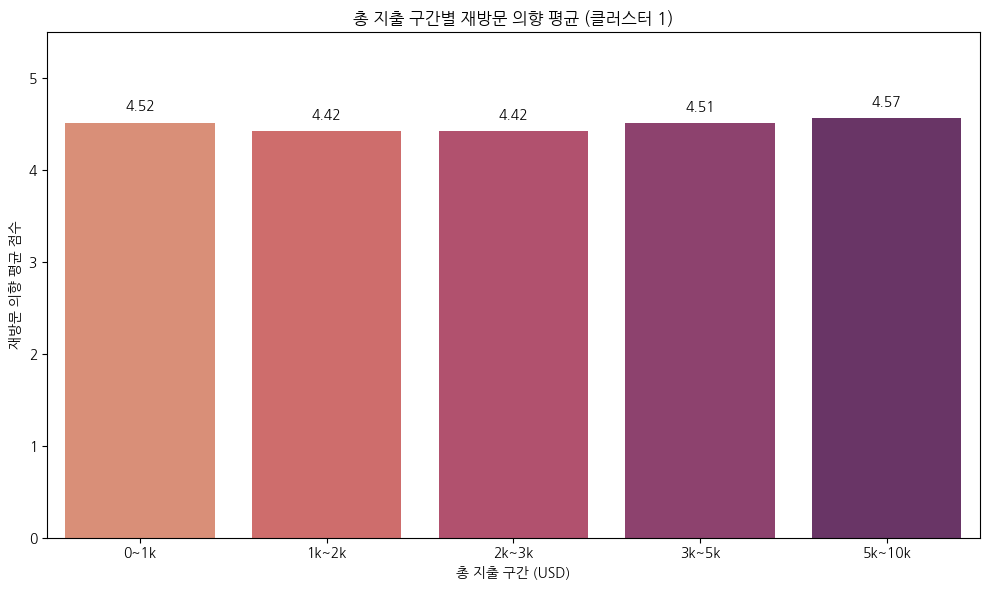

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시각화에 사용할 원래 순서와 간단한 레이블 정의
order = [
    '1000$ 이하',
    '1000$ 초과 - 2000$ 이하',
    '2000$ 초과 - 3000$ 이하',
    '3000$ 초과 - 5000$ 이하',
    '5000$ 초과 - 10000$ 이하'
]

label_map = {
    '1000$ 이하': '0~1k',
    '1000$ 초과 - 2000$ 이하': '1k~2k',
    '2000$ 초과 - 3000$ 이하': '2k~3k',
    '3000$ 초과 - 5000$ 이하': '3k~5k',
    '5000$ 초과 - 10000$ 이하': '5k~10k'
}

# 2. Q13을 숫자로 매핑
q13_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}
df_cluster1_2024["Q13_numeric"] = df_cluster1_2024["Q13"].map(q13_map)

# 3. 유효한 값만 필터링
df_valid = df_cluster1_2024[
    df_cluster1_2024["C총액1인TOT2"].isin(order) &
    df_cluster1_2024["Q13_numeric"].notna()
].copy()

# 4. 간단한 레이블 컬럼 추가
df_valid["총지출_간단"] = df_valid["C총액1인TOT2"].map(label_map)

# 5. 평균값 계산 (간단 레이블 기준)
simple_order = [label_map[o] for o in order]
mean_scores = df_valid.groupby("총지출_간단")["Q13_numeric"].mean().reindex(simple_order)

# 6. 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_scores.index, y=mean_scores.values, palette="flare")
plt.xlabel("총 지출 구간 (USD)")
plt.ylabel("재방문 의향 평균 점수")
plt.title("총 지출 구간별 재방문 의향 평균 (클러스터 1)")
plt.ylim(0, 5.5)

# 7. 막대 위에 수치 표시
for i, v in enumerate(mean_scores.values):
    ax.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


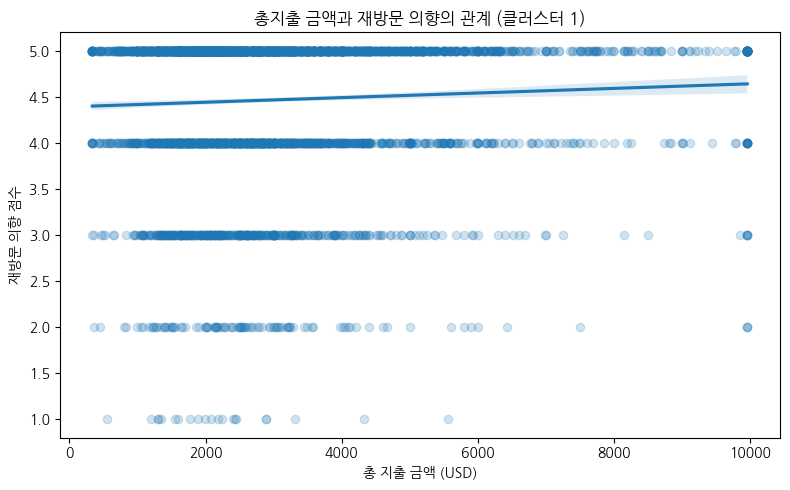

In [ ]:
# Q13 → 숫자형 매핑
q13_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

df_numeric = df_cluster1_2024[
    df_cluster1_2024["Q13"].isin(q13_map.keys()) &
    df_cluster1_2024["총액1인TOT2"].notna()
].copy()

df_numeric["Q13_numeric"] = df_numeric["Q13"].map(q13_map)

# 그래프: 지출 금액 vs 재방문 의향 (산점도 + 회귀선)
plt.figure(figsize=(8, 5))
sns.regplot(data=df_numeric, x="총액1인TOT2", y="Q13_numeric", scatter_kws={"alpha": 0.2})
plt.xlabel("총 지출 금액 (USD)")
plt.ylabel("재방문 의향 점수")
plt.title("총지출 금액과 재방문 의향의 관계 (클러스터 1)")
plt.tight_layout()
plt.show()


### 쇼핑비

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import koreanize_matplotlib

# 1. 응답값 매핑
q13_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

label_map = {
    '0$': '0',
    '0$ 초과 ~ 30$ 이하': '0초과~30이하',
    '30$ 초과 ~ 100$ 이하': '30초과~100이하',
    '100$ 초과': '100 초과'
}
order = ['0', '0초과~30이하', '30초과~100이하', '100 초과']

# 2. 유효 데이터 필터링
df_valid = df_cluster1_2024[
    df_cluster1_2024["C쇼핑비1인대체"].isin(label_map.keys()) &
    df_cluster1_2024["Q13"].isin(q13_map.keys())
].copy()

# 3. 컬럼 매핑 적용
df_valid["Q13_numeric"] = df_valid["Q13"].map(q13_map)
df_valid["C쇼핑비_간단"] = df_valid["C쇼핑비1인대체"].map(label_map)

# 4. 교차표 생성 (행 비율 %)
cross = pd.crosstab(
    df_valid["C쇼핑비_간단"],
    df_valid["Q13_numeric"],
    normalize='index'
) * 100
cross = cross.reindex(index=order, columns=[1, 2, 3, 4, 5])  # 순서 정렬

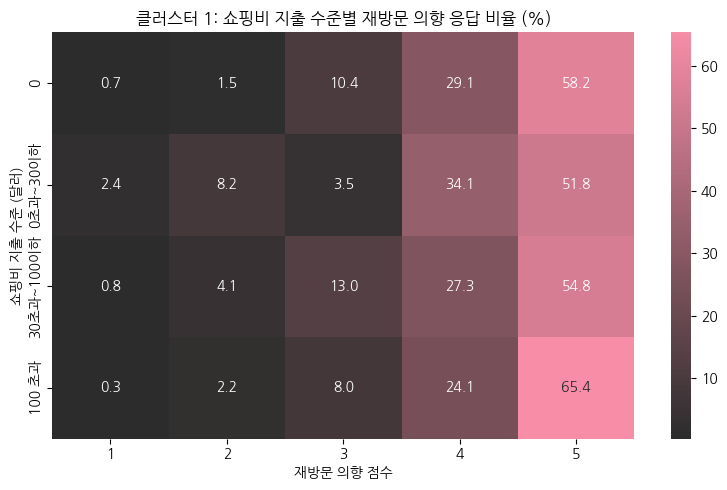

In [ ]:
# 5. 사용자 정의 컬러맵 (회색 → 분홍)
pink_gray = LinearSegmentedColormap.from_list("pinkgray", ["#2c2c2c", "#f78da7"], N=256)

# 6. 히트맵 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(
    cross,
    annot=True,
    fmt=".1f",
    cmap=pink_gray,
    cbar=True
)

plt.xlabel("재방문 의향 점수")
plt.ylabel("쇼핑비 지출 수준 (달러)")
plt.title("클러스터 1: 쇼핑비 지출 수준별 재방문 의향 응답 비율 (%)")
plt.tight_layout()
plt.show()


### 음식점

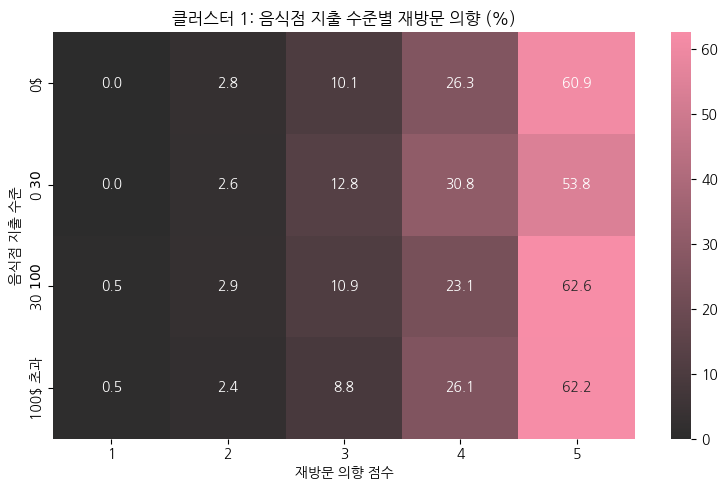

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import koreanize_matplotlib

# ① 응답값 매핑
q13_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

# ② 지출 범주 매핑 - 음식점
label_map_food = {
    '0$': '0$',
    '0$ 초과 ~ 30$ 이하': '0$~30$',
    '30$ 초과 ~ 100$ 이하': '30$~100$',
    '100$ 초과': '100$ 초과'
}
order_food = ['0$', '0$~30$', '30$~100$', '100$ 초과']

# ③ 유효 데이터 필터링
df_food = df_cluster1_2024[
    df_cluster1_2024["C음식점1인대체"].isin(label_map_food.keys()) &
    df_cluster1_2024["Q13"].isin(q13_map.keys())
].copy()

df_food["Q13_numeric"] = df_food["Q13"].map(q13_map)
df_food["지출_간단"] = df_food["C음식점1인대체"].map(label_map_food)

# ④ 교차표 및 히트맵
cross_food = pd.crosstab(
    df_food["지출_간단"], df_food["Q13_numeric"], normalize='index'
) * 100
cross_food = cross_food.reindex(index=order_food, columns=[1, 2, 3, 4, 5])

cmap = LinearSegmentedColormap.from_list("pinkgray", ["#2c2c2c", "#f78da7"], N=256)

plt.figure(figsize=(8, 5))
sns.heatmap(cross_food, annot=True, fmt=".1f", cmap=cmap, cbar=True)
plt.xlabel("재방문 의향 점수")
plt.ylabel("음식점 지출 수준")
plt.title("클러스터 1: 음식점 지출 수준별 재방문 의향 (%)")
plt.tight_layout()
plt.show()


### **숙박비**

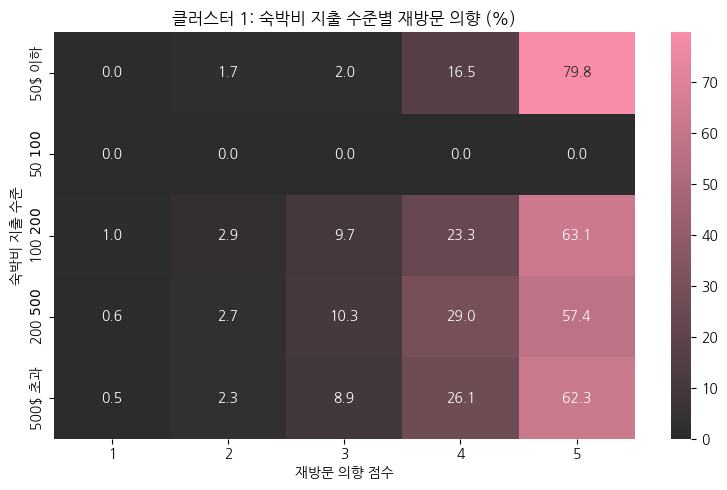

In [ ]:
# ① 지출 범주 매핑 - 숙박비
label_map_stay = {
    '50$ 이하': '50$ 이하',
    '50$ 초과 ~ 100$ 이하': '50$~100$',
    '100$ 초과 ~ 200$ 이하': '100$~200$',
    '200$ 초과 ~ 500$ 이하': '200$~500$',
    '500$ 초과': '500$ 초과'
}
order_stay = ['50$ 이하', '50$~100$', '100$~200$', '200$~500$', '500$ 초과']

# ② 유효 데이터 필터링
df_stay = df_cluster1_2024[
    df_cluster1_2024["C숙박비1인대체"].isin(label_map_stay.keys()) &
    df_cluster1_2024["Q13"].isin(q13_map.keys())
].copy()

df_stay["Q13_numeric"] = df_stay["Q13"].map(q13_map)
df_stay["지출_간단"] = df_stay["C숙박비1인대체"].map(label_map_stay)

# ③ 교차표 및 히트맵
cross_stay = pd.crosstab(
    df_stay["지출_간단"],
    df_stay["Q13_numeric"],
    normalize='index'
) * 100

# 재인덱스할 때 fill_value=0을 추가
cross_stay = cross_stay.reindex(
    index=order_stay,          # ['50$ 이하', '50$~100$', '100$~200$', '200$~500$', '500$ 초과']
    columns=[1,2,3,4,5],
    fill_value=0               # 없는 조합은 0%로 채움
)

plt.figure(figsize=(8, 5))
sns.heatmap(cross_stay, annot=True, fmt=".1f", cmap=cmap, cbar=True)
plt.xlabel("재방문 의향 점수")
plt.ylabel("숙박비 지출 수준")
plt.title("클러스터 1: 숙박비 지출 수준별 재방문 의향 (%)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Define the 숙박비 범주
categories = ['50$ 이하', '50$ 초과 ~ 100$ 이하', '100$ 초과 ~ 200$ 이하', '200$ 초과 ~ 500$ 이하', '500$ 초과']

# Count occurrences in 클러스터1 데이터프레임
counts = df_cluster1_2024['C숙박비1인대체'].value_counts().reindex(categories, fill_value=0)

# Prepare DataFrame for display
df_counts = counts.rename_axis('숙박비 범주').reset_index(name='count')

# Display to user
display('클러스터1 숙박비 범주별 값 개수', df_counts)


'클러스터1 숙박비 범주별 값 개수'

,숙박비 범주,count
0,50$ 이하,351
1,50$ 초과 ~ 100$ 이하,0
2,100$ 초과 ~ 200$ 이하,309
3,200$ 초과 ~ 500$ 이하,1361
4,500$ 초과,1900


🎯클러스터1 타깃 전략 제안 <br>

1. “가성비 충성층”(≤50$) 활용
  - 소셜 미디어 챌린지, 추천 이벤트 등을 통해 ‘저렴하지만 알짜 경험’을 강조해 이들의 재방문을 더욱 공고히.

2. “회색지대” 중간 지출층(50$~200$) 공략
  - 숙박 업그레이드 쿠폰, 현장 서비스 체험권 등을 제공해 ‘보통→매우’ 만족으로 전환 유도.

3. “프리미엄 충성층”(200$+)에서 부가가치 창출
  - 럭셔리 패키지, 지속가능·로컬 체험 연계 상품으로 재방문 의사를 안정적으로 유지.

4. 전 구간 공통: 콘텐츠·데이터 기반 맞춤 설계
  - 앞서 PDF에서 제시한 “숙박·교통·소비 데이터를 통합 분석” 전략을 그대로 적용해,
지출 패턴별로 맞춤형 재방문 프로모션을 기획하세요.

## 총 지출별 세부 만족도

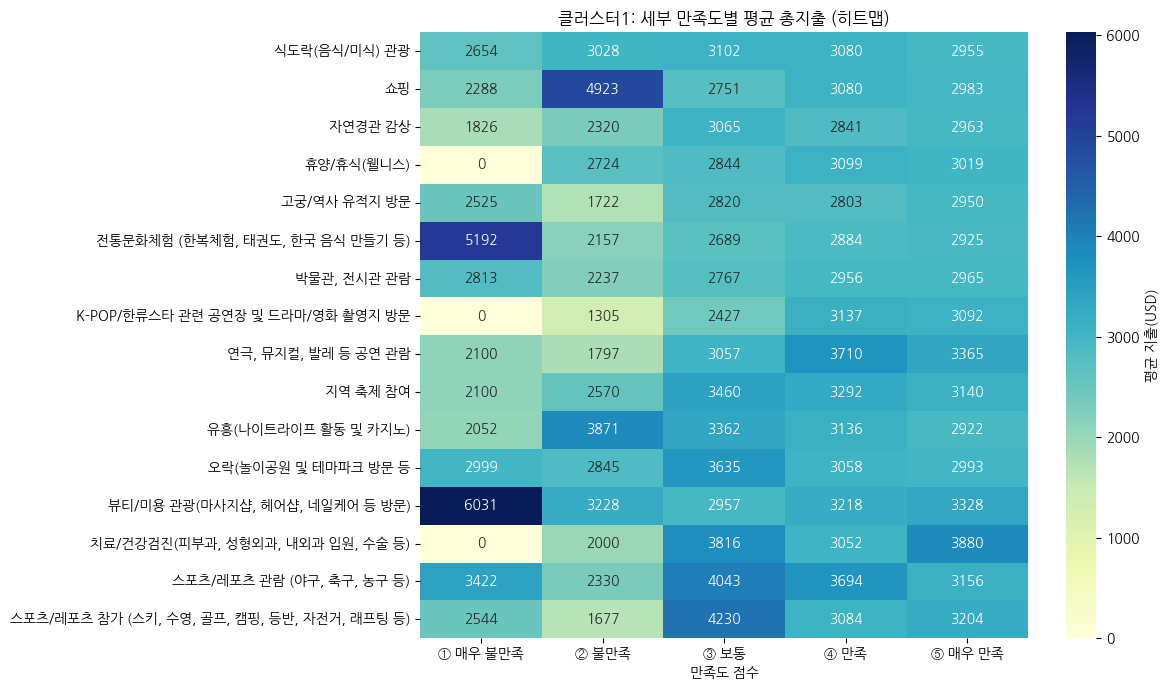

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 사용할 세부 만족도 컬럼
satisfaction_cols = [
    'Q12a01', 'Q12a02', 'Q12a03', 'Q12a04','Q12a05', 'Q12a06', 'Q12a07', 'Q12a08',
    'Q12a09', 'Q12a10', 'Q12a11', 'Q12a12','Q12a13', 'Q12a14', 'Q12a15', 'Q12a16',
]
spend_col = '총액1인TOT2'

# 2) melt 방식으로 평균 지출 계산
df_melt = df_cluster1_2024.melt(
    id_vars=spend_col,
    value_vars=satisfaction_cols,
    var_name='만족항목',
    value_name='만족도'
)

mean_spend = (
    df_melt
    .groupby(['만족항목', '만족도'])[spend_col]
    .mean()
    .reset_index()
)

# 3) pivot_table 사용 + fill_value=0 (0이라면 0으로)
pivot = mean_spend.pivot_table(
    index='만족항목',
    columns='만족도',
    values=spend_col,
    aggfunc='mean',
    fill_value=0
)

# 4) 원하는 한글 레이블 매핑
label_map = {
    "Q12a01": "식도락(음식/미식) 관광",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "휴양/휴식(웰니스)",
    "Q12a05": "고궁/역사 유적지 방문",
    "Q12a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q12a07": "박물관, 전시관 관람",
    "Q12a08": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a09": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a10": "지역 축제 참여",
    "Q12a11": "유흥(나이트라이프 활동 및 카지노)",
    "Q12a12": "오락(놀이공원 및 테마파크 방문 등",
    "Q12a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q12a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)",
}

# pivot의 인덱스 순서를 label_map 순서에 맞추고 이름 변경
pivot = pivot.reindex(label_map.keys())
pivot.index = pivot.index.map(label_map)

# 5) 히트맵 그리기
plt.figure(figsize=(12, 7))
ax = sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",           # 소수점 없이 정수 표기
    cmap="YlGnBu",
    cbar_kws={'label':'평균 지출(USD)'}
)
ax.set_title("클러스터1: 세부 만족도별 평균 총지출 (히트맵)")
ax.set_xlabel("만족도 점수")
ax.set_ylabel("")       # y축 라벨 대신 인덱스(한글)가 보이도록
plt.yticks(rotation=0)  # y축 레이블 가로 방향으로
plt.tight_layout()
plt.show()


In [ ]:
print(df_cluster1_2024["pnid"].count())

4158


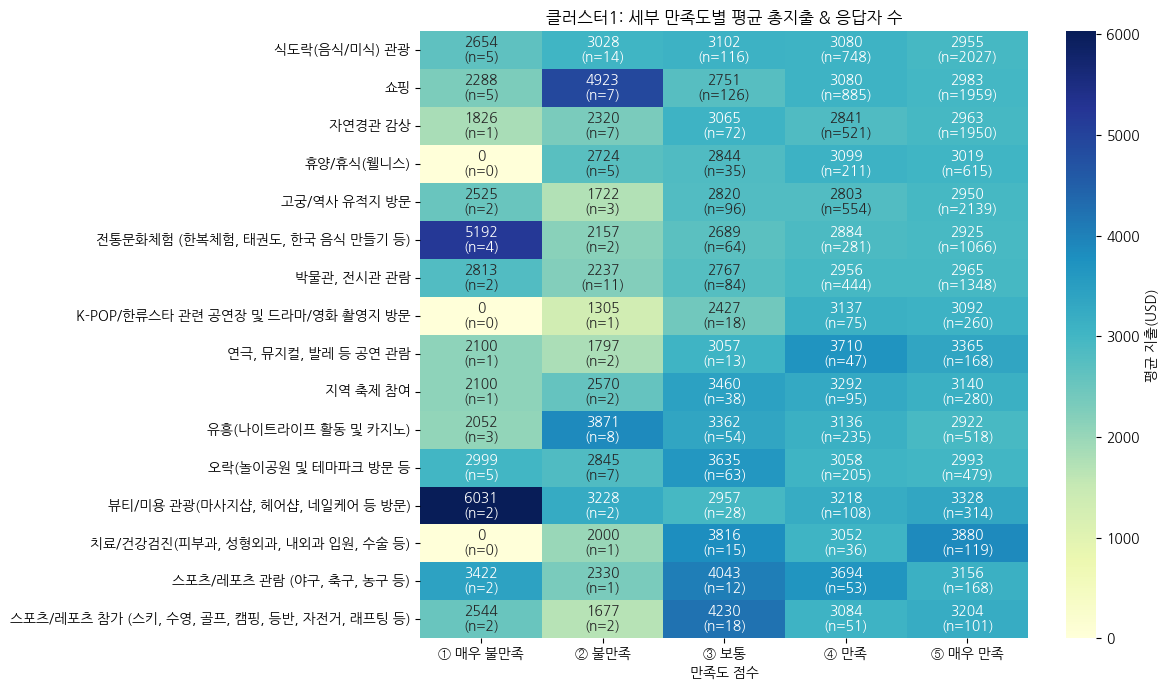

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) melt 방식으로 데이터 준비
df_melt = df_cluster1_2024.melt(
    id_vars=spend_col,
    value_vars=satisfaction_cols,
    var_name='만족항목',
    value_name='만족도'
)

# 2) 평균 지출 계산 (pivot_mean)
pivot_mean = df_melt.pivot_table(
    index='만족항목',
    columns='만족도',
    values=spend_col,
    aggfunc='mean',
    fill_value=0
)

# 3) 응답자 수 계산 (pivot_count)
pivot_count = df_melt.pivot_table(
    index='만족항목',
    columns='만족도',
    values=spend_col,
    aggfunc='count',
    fill_value=0
)

# 4) 한글 레이블 매핑 (이전 예제와 동일)
label_map = {
    "Q12a01": "식도락(음식/미식) 관광",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "휴양/휴식(웰니스)",
    "Q12a05": "고궁/역사 유적지 방문",
    "Q12a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q12a07": "박물관, 전시관 관람",
    "Q12a08": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a09": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a10": "지역 축제 참여",
    "Q12a11": "유흥(나이트라이프 활동 및 카지노)",
    "Q12a12": "오락(놀이공원 및 테마파크 방문 등",
    "Q12a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q12a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)",
}
pivot_mean = pivot_mean.reindex(label_map.keys())
pivot_mean.index = pivot_mean.index.map(label_map)
pivot_count = pivot_count.reindex(label_map.keys())
pivot_count.index = pivot_count.index.map(label_map)

# 5) annot용 문자열 행렬 생성
annot = pivot_mean.round(0).astype(int).astype(str) \
        + "\n(n=" + pivot_count.astype(int).astype(str) + ")"

# 6) 히트맵 그리기
plt.figure(figsize=(12,7))
ax = sns.heatmap(
    pivot_mean,
    annot=annot,
    fmt='',
    cmap="YlGnBu",
    cbar_kws={'label':'평균 지출(USD)'}
)
ax.set_title("클러스터1: 세부 만족도별 평균 총지출 & 응답자 수")
ax.set_xlabel("만족도 점수")
ax.set_ylabel("")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### 도출!
1. 고지출 활동은 뷰티·의료·레포츠

| 활동             | 만족도-지출                              |
| -------------- | ----------------------------------- |
| **뷰티/미용 관광**   | 매우 불만족(6031), 만족(3218), 매우 만족(3282) |
| **치료/건강검진**    | 만족(3705), 매우 만족(3880)               |
| **스포츠/레포츠 참가** | 보통(4230), 매우 만족(3204)               |

- 이 활동군은 만족도에 관계없이 전반적으로 지출 수준 높음

- 건강·미용·레포츠 분야는 체험 단가 자체가 높고, 일정 수준의 만족을 동반할 경우 재소비 가능성도 높음
- 특히 스포츠/레포츠 참가(예: 스키, 골프, 캠핑) 항목은 모든 만족도 구간에서 3,000달러 이상 유지하며, '보통'일 때 오히려 최고치(4230).
- ✅ 전략 제안: 클러스터1 고소비층을 겨냥한 '건강·뷰티·레포츠' 중심 패키지 상품화

<br>

2. 기존 인기 관광 콘텐츠의 ROI는 낮음
- 식도락, 쇼핑, 자연경관 감상, 고궁/역사 유적지 방문 등 전통 관광활동은 응답자 수는 많지만 지출은 대체로 2,500~3,200 USD 수준.

- 예: 쇼핑 – 만족(3080), 매우 만족(2983), 자연경관 – 만족(2841), 매우 만족(2963)
- → 이는 대중성은 높지만 지출 견인력이 낮은 콘텐츠임을 의미
- ✅ 전략 제안: 이 콘텐츠들은 체류일 수 연장/재방문 유도에 주력하고, 지출 확대는 한계가 있음.

<br>

3. 낮은 만족도에서도 지출이 높은 항목 존재
- 전통문화체험: 매우 불만족(n=4) 평균 5192 USD
- 뷰티/미용 관광: 매우 불만족(n=2) 평균 6031 USD
- → ‘만족도는 낮지만 큰돈을 쓴 고객군’ 존재. 이는 서비스 품질 불만족, 기대 대비 낮은 효용 등을 의미

- ✅ 전략 제안: 환불 보장, 후기 기반 개선, 고객 사후 케어 제도를 통해 이탈을 막는 게 중요
- 해당 고지출 군은 사후 응대 및 품질관리 강화가 필요

<br>

4. 만족도와 지출의 일반적 상관성은 '약함'
- 다수 항목에서 만족도 3~5점 구간의 지출 차이는 크지 않음.

- 예: 자연경관 감상 → 보통(3065), 만족(2841), 매우 만족(2963)
- → 이는 ‘매우 만족시 더 지출’이라는 일반 가정이 잘 작동하지 않음을 의미합니다.
- ✅ 전략 제안: “보통(3점)” → “만족(4점)”으로 끌어올리는 전환 전략이 실질적 소비 증가보다 효과적일 수 있음.
- 즉, 하이엔드 만족보다 ‘불편함 최소화’ 전략이 비용 대비 효과가 클 수 있음.

# **지역**

/tmp/ipython-input-63-1972259758.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=visit_df.index, y=visit_df["방문률(%)"], palette="RdPu_r")


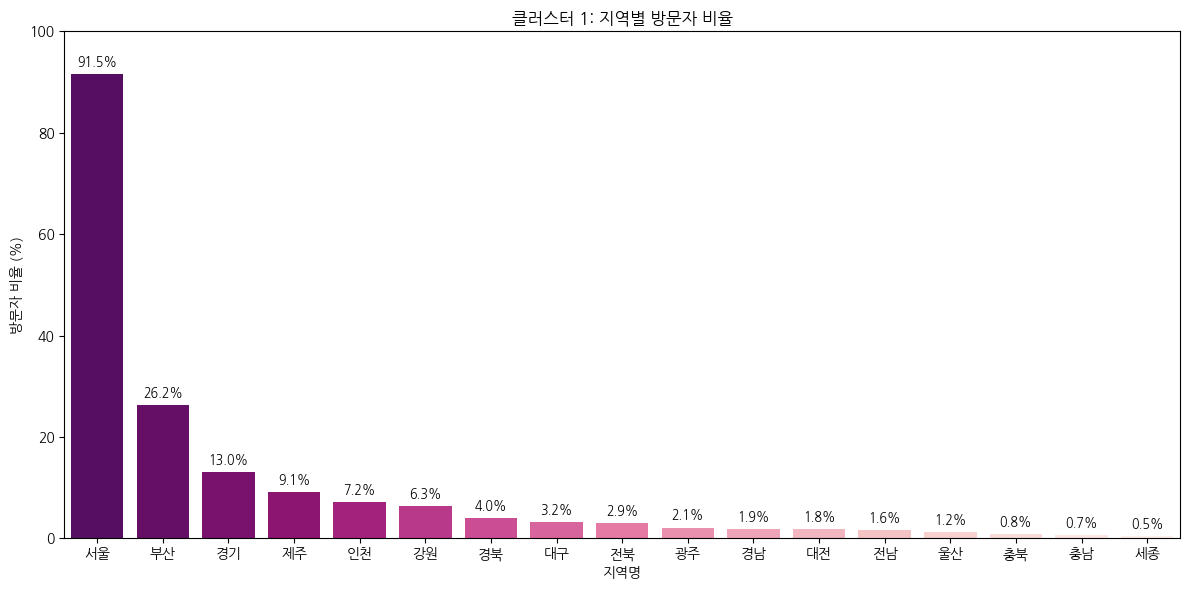

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 지역 관련 변수 추출
region_cols = [col for col in df_cluster1_2024.columns if col.endswith("일TOT")]

# 2. 각 지역별 방문자 비율 계산
region_visit_rates = {}
total = len(df_cluster1_2024)

for region in region_cols:
    visited_count = (df_cluster1_2024[region] > 0).sum()
    region_name = region.replace("일TOT", "")
    region_visit_rates[region_name] = visited_count / total * 100

# 3. 데이터프레임 변환 및 정렬
visit_df = pd.DataFrame.from_dict(region_visit_rates, orient="index", columns=["방문률(%)"])
visit_df = visit_df.sort_values(by="방문률(%)", ascending=False)

# 4. 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=visit_df.index, y=visit_df["방문률(%)"], palette="RdPu_r")
plt.xticks(rotation=0)
plt.ylabel("방문자 비율 (%)")
plt.xlabel("지역명")
plt.title("클러스터 1: 지역별 방문자 비율")
plt.ylim(0, 100)

# 5. 막대 위에 수치 표시
for i, value in enumerate(visit_df["방문률(%)"]):
    ax.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


/tmp/ipython-input-65-2500629603.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=visitor_df.index, y=visitor_df["방문자수"], palette="BuPu_r")


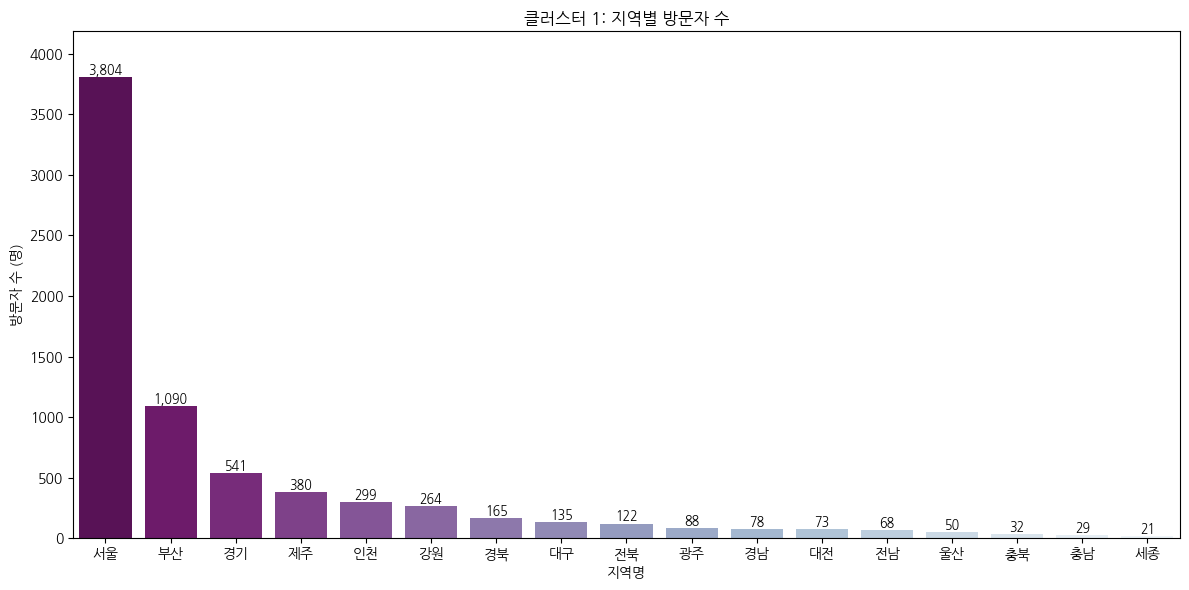

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 지역 관련 변수 추출
region_cols = [col for col in df_cluster1_2024.columns if col.endswith("일TOT")]

# 2. 각 지역별 방문자 수 계산
region_visitor_counts = {}

for region in region_cols:
    visited_count = (df_cluster1_2024[region] > 0).sum()
    region_name = region.replace("일TOT", "")
    region_visitor_counts[region_name] = visited_count

# 3. 데이터프레임 변환 및 정렬
visitor_df = pd.DataFrame.from_dict(region_visitor_counts, orient="index", columns=["방문자수"])
visitor_df = visitor_df.sort_values(by="방문자수", ascending=False)

# 4. 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=visitor_df.index, y=visitor_df["방문자수"], palette="BuPu_r")
plt.xticks(rotation=0)
plt.ylabel("방문자 수 (명)")
plt.xlabel("지역명")
plt.title("클러스터 1: 지역별 방문자 수")
plt.ylim(0, visitor_df["방문자수"].max() * 1.1)

# 5. 막대 위에 수치 표시
for i, value in enumerate(visitor_df["방문자수"]):
    ax.text(i, value + 1, f"{value:,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


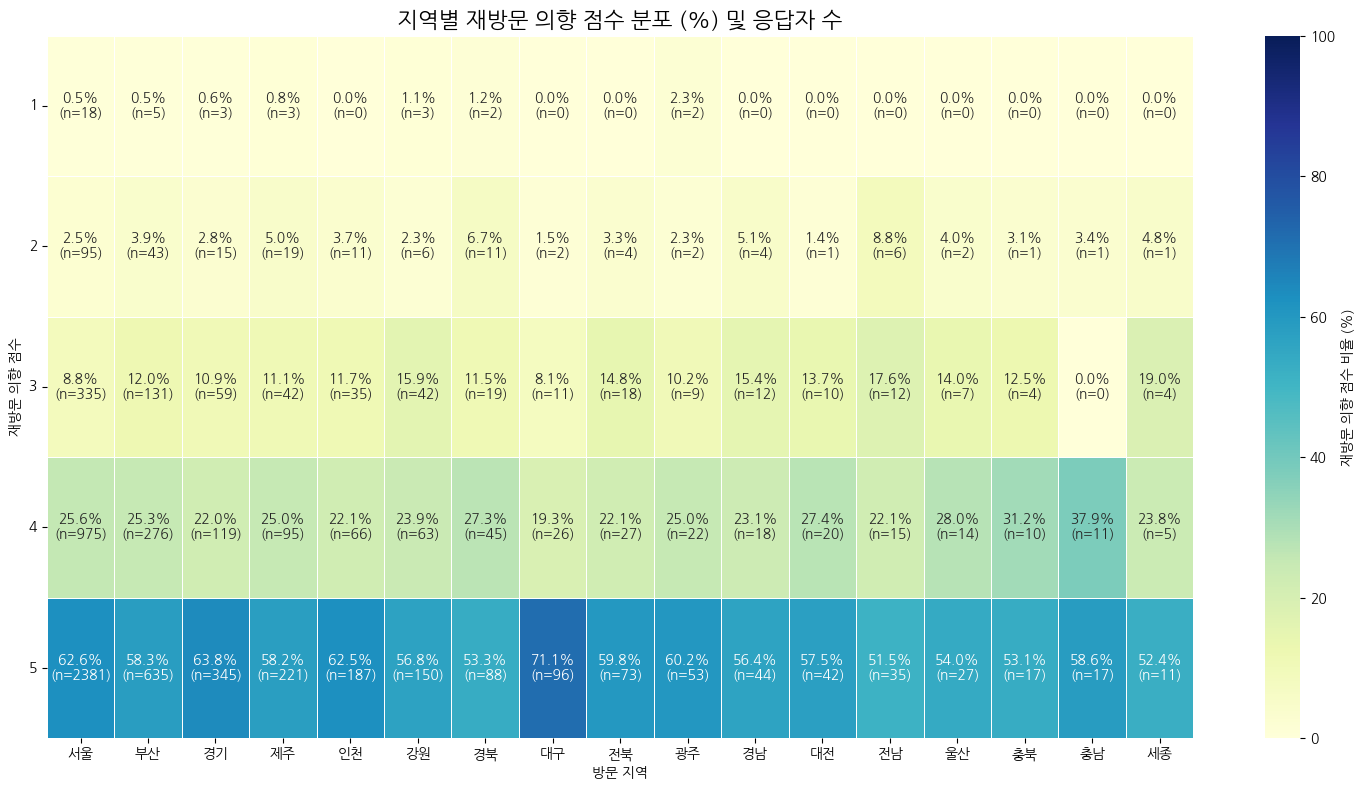

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트 적용

# 1. Q13 점수 매핑
q13_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}
df_cluster1_2024["Q13_numeric"] = df_cluster1_2024["Q13"].map(q13_map)

# 2. 지역 관련 컬럼 추출
region_cols = [col for col in df_cluster1_2024.columns if col.endswith("일TOT")]

# 3. 지역별 방문자 수 계산
region_visits = {
    col.replace("일TOT", ""): (df_cluster1_2024[col] > 0).sum()
    for col in region_cols
}
sorted_regions = sorted(region_visits, key=region_visits.get, reverse=True)

# 4. 비율과 카운트 히트맵용 데이터프레임 생성
percentage_df = pd.DataFrame(index=range(1, 6))
count_df = pd.DataFrame(index=range(1, 6))

for col in region_cols:
    region = col.replace("일TOT", "")
    visited = df_cluster1_2024[df_cluster1_2024[col] > 0]
    value_counts = visited["Q13_numeric"].value_counts()
    value_percents = visited["Q13_numeric"].value_counts(normalize=True) * 100

    counts_full = pd.Series({i: 0 for i in range(1, 6)})
    percents_full = pd.Series({i: 0.0 for i in range(1, 6)})

    counts_full.update(value_counts)
    percents_full.update(value_percents)

    percentage_df[region] = percents_full
    count_df[region] = counts_full

# 5. 열 순서 정렬
percentage_df = percentage_df[sorted_regions]
count_df = count_df[sorted_regions]

# 6. 주석 텍스트 생성: "42.3%\n(n=101)" 형태
annot_df = percentage_df.copy()
for col in annot_df.columns:
    annot_df[col] = [
        f"{percentage_df[col][i]:.1f}%\n(n={int(count_df[col][i])})"
        for i in percentage_df.index
    ]

# 7. 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(
    percentage_df,
    annot=annot_df,
    fmt="",
    cmap="YlGnBu",
    linewidths=0.4,
    cbar_kws={"label": "재방문 의향 점수 비율 (%)"},
    vmin=0, vmax=100
)

plt.title("지역별 재방문 의향 점수 분포 (%) 및 응답자 수", fontsize=16)
plt.xlabel("방문 지역")
plt.ylabel("재방문 의향 점수")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-80-2869923804.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  activity_df.loc[label, "참여율(%)"] = percent.get(1, 0)
/tmp/ipython-input-80-2869923804.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  activity_df.loc[label, "참여율(%)"] = percent.get(1, 0)
/tmp/ipython-input-80-2869923804.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  activity_df.loc[label, "참여율(%)"] = percent.get(1, 0)
/tmp/ipython-input-

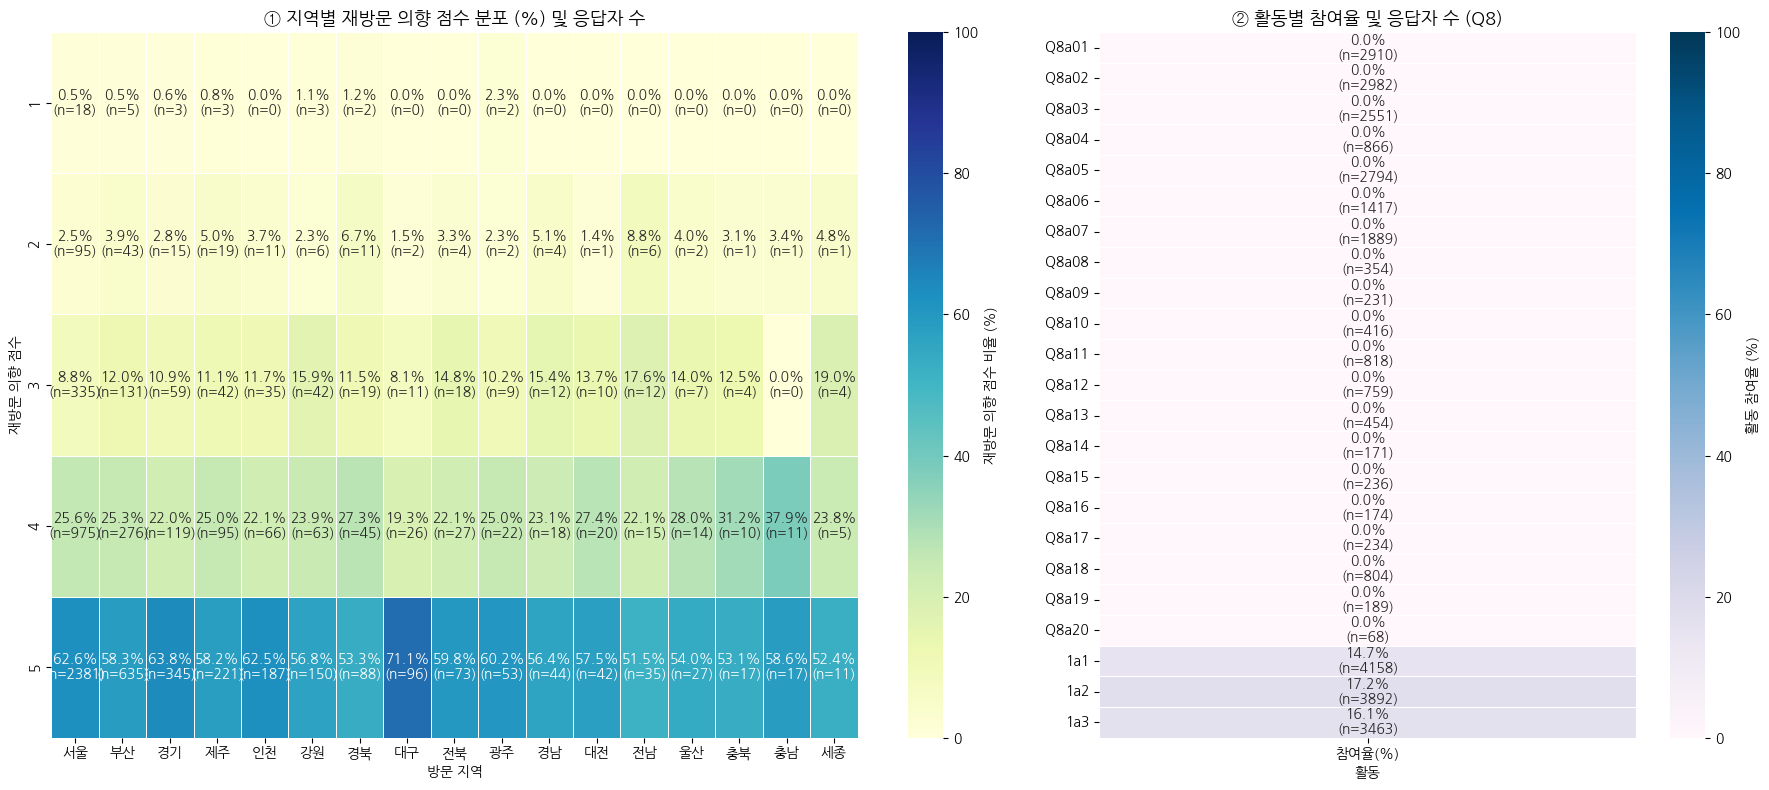

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 기존 지역별 재방문 의향 히트맵: 왼쪽 패널
# → 이전 코드 재활용 (percentage_df, count_df, annot_df 사용)

# 2. Q8 활동 경험 비율 히트맵: 오른쪽 패널 준비
# 예시: 활동 관련 열만 선택 (Q8 항목이 활동 여부를 묻는 binary 형식이라면)
activity_cols = [col for col in df_cluster1_2024.columns if col.startswith("Q8")]
activity_labels = {col: col.replace("Q8_", "") for col in activity_cols}

# 각 지역별 활동 경험 비율 계산
activity_df = pd.DataFrame(index=activity_labels.values())
activity_count = pd.DataFrame(index=activity_labels.values())

for col in activity_cols:
    label = activity_labels[col]
    valid = df_cluster1_2024[col].notna()
    percent = df_cluster1_2024[col][valid].value_counts(normalize=True) * 100
    count = df_cluster1_2024[col][valid].value_counts()

    # 예: 1=활동함, 0=안함인 경우
    activity_df.loc[label, "참여율(%)"] = percent.get(1, 0)
    activity_count.loc[label, "응답자 수"] = count.sum()

# 주석 생성
activity_df["annot"] = activity_df["참여율(%)"].apply(lambda x: f"{x:.1f}%")
activity_df["annot"] += activity_count["응답자 수"].apply(lambda x: f"\n(n={int(x)})")

# 3. 시각화 - 두 히트맵 병렬 배치
fig, axes = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [3, 2]})

# 왼쪽 히트맵 (재방문 의향)
sns.heatmap(
    percentage_df,
    annot=annot_df,
    fmt="",
    cmap="YlGnBu",
    ax=axes[0],
    linewidths=0.4,
    vmin=0, vmax=100,
    cbar_kws={"label": "재방문 의향 점수 비율 (%)"}
)
axes[0].set_title("① 지역별 재방문 의향 점수 분포 (%) 및 응답자 수", fontsize=13)
axes[0].set_xlabel("방문 지역")
axes[0].set_ylabel("재방문 의향 점수")

# 오른쪽 히트맵 (활동 참여율)
sns.heatmap(
    activity_df[["참여율(%)"]],
    annot=activity_df["annot"].values.reshape(-1,1),
    fmt="",
    cmap="PuBu",
    ax=axes[1],
    linewidths=0.4,
    vmin=0, vmax=100,
    cbar_kws={"label": "활동 참여율 (%)"}
)
axes[1].set_title("② 활동별 참여율 및 응답자 수 (Q8)", fontsize=13)
axes[1].set_xlabel("활동")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


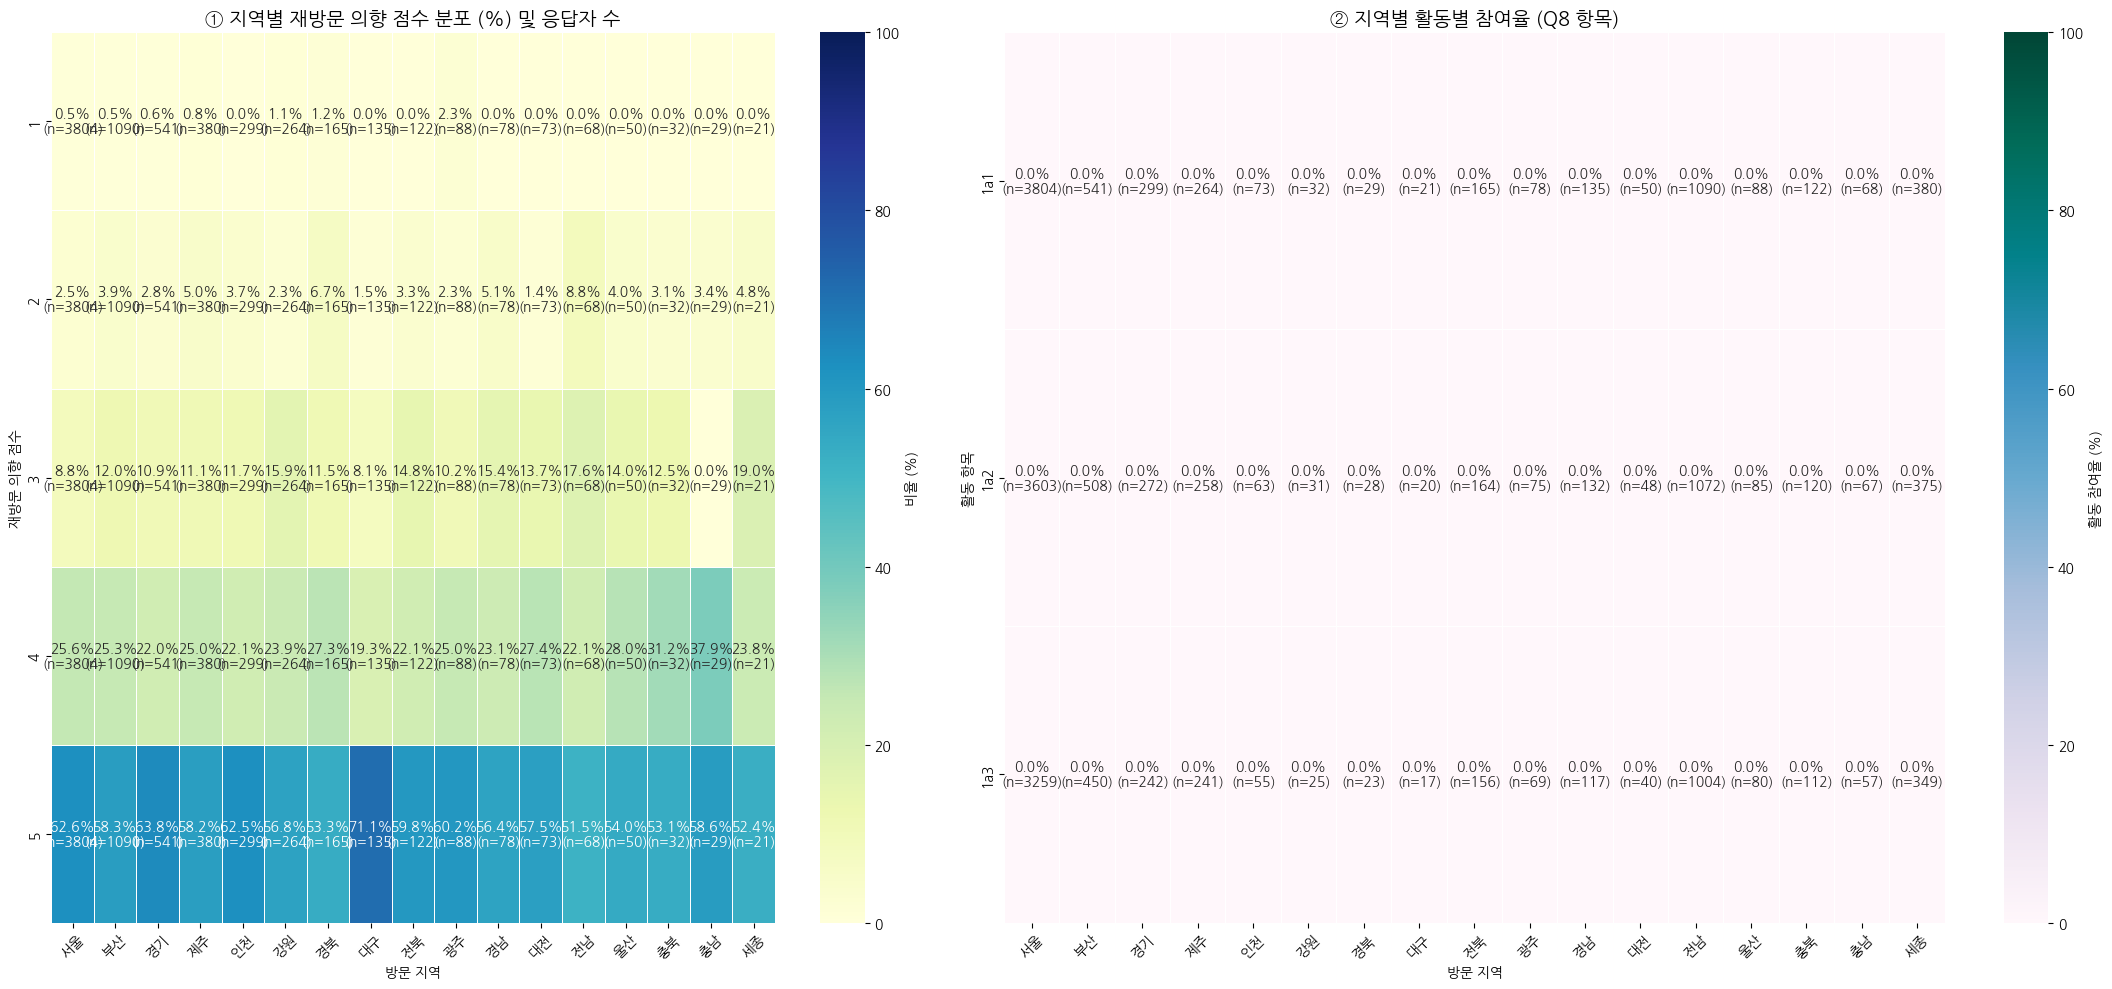

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q13 매핑
q13_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}
df_cluster1_2024["Q13_numeric"] = df_cluster1_2024["Q13"].map(q13_map)

# 방문 지역 변수 추출
region_cols = [col for col in df_cluster1_2024.columns if col.endswith("일TOT")]
region_names = [col.replace("일TOT", "") for col in region_cols]

# 지역별 방문자 수
region_visits = {region: (df_cluster1_2024[col] > 0).sum() for col, region in zip(region_cols, region_names)}
sorted_regions = sorted(region_visits, key=region_visits.get, reverse=True)

# 🔹 [왼쪽] 재방문 의향 점수 비율 + 응답자 수
heatmap_data = pd.DataFrame(index=range(1, 6))
annot_data = pd.DataFrame(index=range(1, 6))

for col in region_cols:
    region = col.replace("일TOT", "")
    visited = df_cluster1_2024[df_cluster1_2024[col] > 0]
    counts = visited["Q13_numeric"].value_counts(normalize=True) * 100
    total = visited["Q13_numeric"].count()

    temp = pd.Series({i: 0.0 for i in range(1, 6)})
    temp.update(counts)
    heatmap_data[region] = temp

    # 주석 생성
    annot_data[region] = temp.apply(lambda x: f"{x:.1f}%")
    annot_data[region] = annot_data[region] + f"\n(n={total})"

heatmap_data = heatmap_data[sorted_regions]
annot_data = annot_data[sorted_regions]

# 🔹 [오른쪽] Q8 활동 참여율 계산
activity_cols = [col for col in df_cluster1_2024.columns if col.startswith("Q8_")]
activity_names = [col.replace("Q8_", "") for col in activity_cols]

# 🔹 활동별 참여율 초기화 (빈 딕셔너리로 생성)
activity_rate = {}
activity_annot = {}

for col, name in zip(activity_cols, activity_names):
    rates = []
    annots = []
    for rcol in region_cols:
        region = rcol.replace("일TOT", "")
        sub_df = df_cluster1_2024[df_cluster1_2024[rcol] > 0]
        if len(sub_df) == 0:
            rate = 0
            count = 0
        else:
            count = sub_df[col].notna().sum()
            rate = (sub_df[col] == 1).sum() / count * 100 if count > 0 else 0

        rates.append(rate)
        annots.append(f"{rate:.1f}%\n(n={count})")

    activity_rate[name] = rates
    activity_annot[name] = annots

# 🔹 DataFrame 변환 및 열 순서 정렬
activity_rate_df = pd.DataFrame(activity_rate, index=sorted_regions).T
activity_annot_df = pd.DataFrame(activity_annot, index=sorted_regions).T


# 🔹 병렬 시각화
fig, axes = plt.subplots(1, 2, figsize=(22, 10), gridspec_kw={'width_ratios': [1, 1.3]})

# 왼쪽 히트맵 (재방문 의향)
sns.heatmap(
    heatmap_data,
    annot=annot_data,
    fmt="",
    cmap="YlGnBu",
    ax=axes[0],
    linewidths=0.4,
    vmin=0, vmax=100,
    cbar_kws={"label": "비율 (%)"}
)
axes[0].set_title("① 지역별 재방문 의향 점수 분포 (%) 및 응답자 수", fontsize=14)
axes[0].set_xlabel("방문 지역")
axes[0].set_ylabel("재방문 의향 점수")
axes[0].tick_params(axis='x', rotation=45)

# 오른쪽 히트맵 (활동 참여율)
sns.heatmap(
    activity_rate_df,
    annot=activity_annot_df,
    fmt="",
    cmap="PuBuGn",
    ax=axes[1],
    linewidths=0.4,
    vmin=0, vmax=100,
    cbar_kws={"label": "활동 참여율 (%)"}
)
axes[1].set_title("② 지역별 활동별 참여율 (Q8 항목)", fontsize=14)
axes[1].set_xlabel("방문 지역")
axes[1].set_ylabel("활동 항목")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
